Populating the interactive namespace from numpy and matplotlib


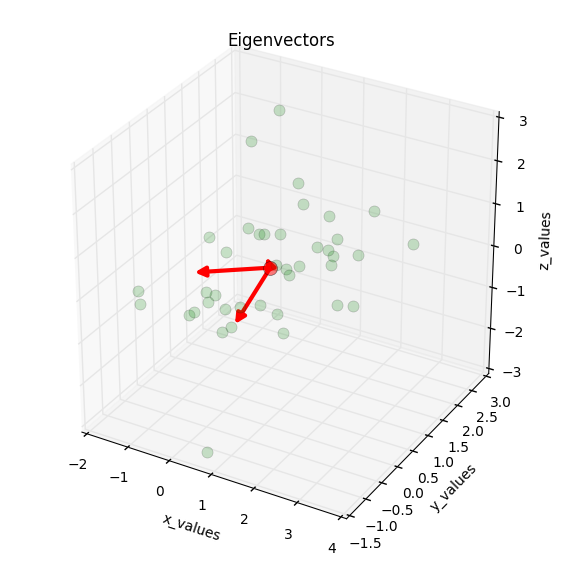

In [3]:
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu1_vec = np.array([0,0,0])
cov1_mat = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu1_vec,cov1_mat,20).T


mu2_vec = np.array([1,1,1])
cov2_mat = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu2_vec,cov2_mat,20).T

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
plt.rcParams['legend.fontsize']=10

ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],'o',alpha=0.5,color='b',label='class 1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],'^',alpha=0.5,color='r',label='class 2')
plt.legend(loc='upper right')



all_samples = np.concatenate((class1_sample,class2_sample),axis=1)

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vect = np.array([mean_x, mean_y, mean_z])

scatter_matrix = np.zeros([3,3])

for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vect).dot((all_samples[:,i].reshape(3,1) - mean_vect).T)

cov_vec = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_vec)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

#     print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
#     print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
#     print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
#     print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
#     print(40 * '-')
    
# fig1 = plt.figure(figsize=(8,8))

for i in range(len(cov_vec)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,decimal=6, err_msg='', verbose=True)
    
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

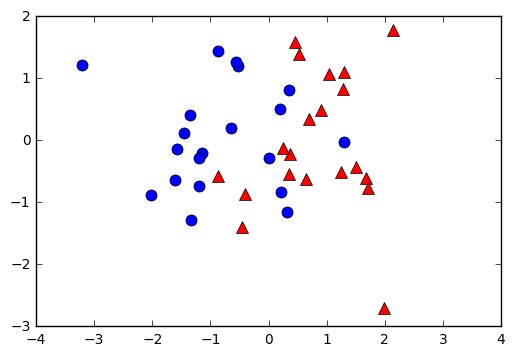

In [11]:

from matplotlib.mlab import PCA as mlabPCA
%matplotlib inline
from matplotlib import numpy as np

mlab_pca = mlabPCA(all_samples.T)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1],'o',markersize=8,color='b')
plt.plot(mlab_pca.Y[20:40,0],mlab_pca.Y[20:40,1],'^',markersize=8,color='r')
plt.xlim(-4,4)
plt.show()